# <center> XGBOOST for a regression problem: House Prices </center>

In [7]:
from pandas import read_csv
import pandas as pd
train_full = read_csv('../HousePrices/seloger-paris-page1-to-200_raw.csv', index_col=0, sep="\t")

In [8]:
train_full = train_full.select_dtypes(exclude='object')

In [9]:
from numpy import random
SEED = 42
random.seed(SEED)

In [10]:
from sklearn.model_selection import train_test_split
VAL_SIZE = 0.2
train, val = train_test_split(train_full, test_size=VAL_SIZE)

## Removing the outliers with IsolationForest

In [11]:
import xgboost
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 objective ='reg:squarederror',
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [12]:
every_column_except_y= [col for col in train.columns if col not in ['price_raw','id']]
model.fit(train[every_column_except_y],train['price_raw'])

/opt/conda/envs/tf2/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/envs/tf2/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0,
       importance_type='gain', learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1,
       seed=42, silent=None, subsample=0.6, verbosity=1)

In [13]:
every_valcolumn_except_y= [col for col in val.columns if col not in ['price_raw','id']]
y_val_predict = model.predict(val[every_valcolumn_except_y])
print(y_val_predict)

[ 244819.4   277766.7   244819.4   210616.45  207375.16  251008.03
  717176.1   264686.03  207375.16  277766.7   314980.78  487221.28
  594536.75  270770.53  314980.78  216986.14  231738.78  347651.22
  322723.    471559.    172019.06  594536.75  230066.8   172019.06
  925865.9   304666.72  594536.75  231738.78  231738.78  378532.47
  210616.45  231738.78  231738.78  251008.03  231738.78  353419.47
  231738.78  594536.75  210616.45  244819.4   506718.56  251008.03
  231738.78  285508.9   471559.    378532.47  993046.    244819.4
  210616.45  366244.38  854099.    628942.25  314980.78  649227.
  444388.53  661697.    366244.38  356817.2   409228.97  314980.78
  301900.16  210616.45  506718.56  244819.4   251008.03  541124.1
  489373.97  351839.8   409228.97  419750.4   231738.78  236788.72
  314980.78  444388.53  444388.53  210616.45  471559.    549551.25
  628942.25  409228.97  277766.7   244819.4   660057.2   244819.4
  356817.2   251008.03  506718.56  378532.47  506718.56  210616.45


## Compute MAE

In [14]:
from sklearn.metrics import mean_absolute_error
y_val = val['price_raw']
mean_absolute_error(y_val, y_val_predict)

308309.50453125

## Find the most relevant features

In [15]:
from collections import OrderedDict
feat_imp = OrderedDict(sorted(model.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))
feat_imp

OrderedDict([('surface_raw', 33), ('room_nb_raw', 24), ('bedroom_nb_raw', 22)])

In [16]:
#Let's remove the less important ones 
most_relevant_features= list(dict((k, v) for k, v in model.get_booster().get_fscore().items() if v >= 10).keys())
print(most_relevant_features)

['surface_raw', 'bedroom_nb_raw', 'room_nb_raw']


<IPython.core.display.Javascript object>


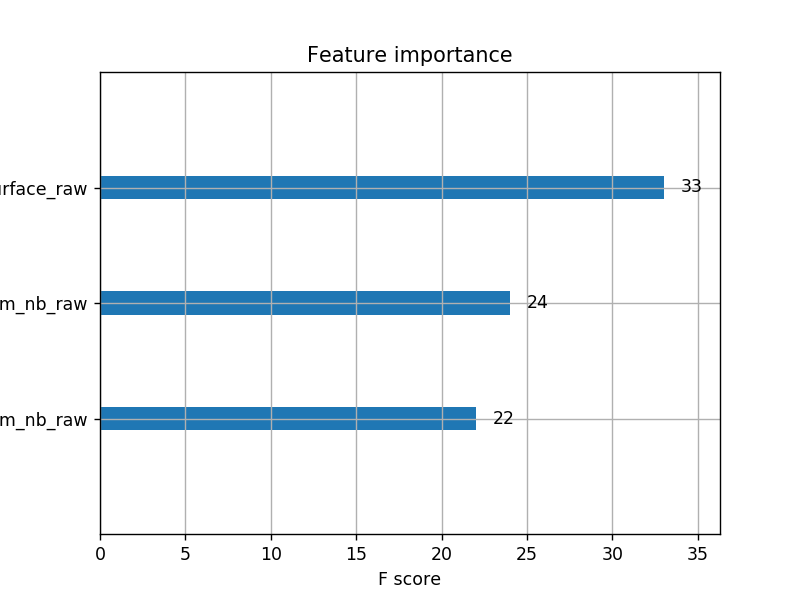

In [18]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
%matplotlib notebook
plot_importance(model, max_num_features=10) # top 10 most important features
plt.show()

<IPython.core.display.Javascript object>


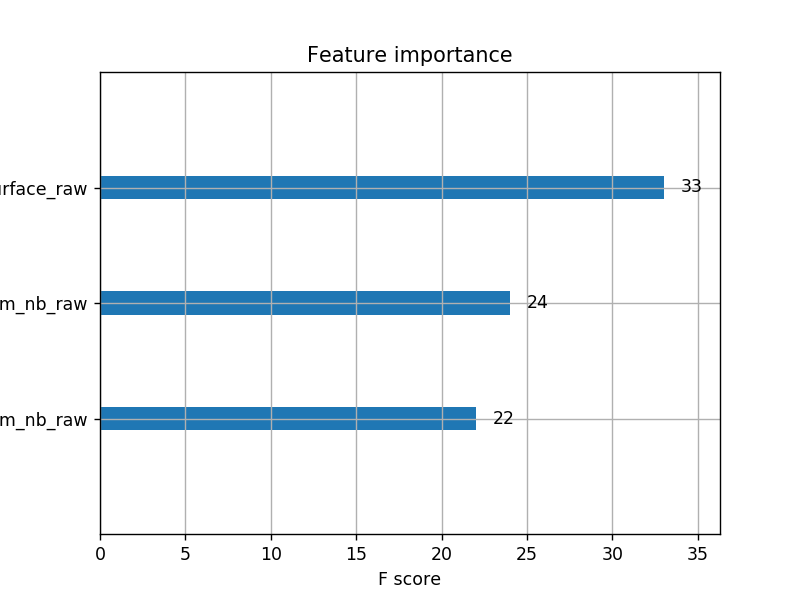

In [19]:
plot_importance(model)
plt.draw()

## Best model with all features

In [20]:
train = pd.read_csv('train_ohe_AZ.csv', index_col=0)
val = pd.read_csv('val_ohe_AZ.csv', index_col=0)

In [21]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 objective ='reg:squarederror',
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

In [22]:
every_column_except_y= [col for col in train.columns if col not in ['price_raw','id']]
best_xgb_model.fit(train[every_column_except_y],train['price_raw'])

/opt/conda/envs/tf2/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/envs/tf2/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0,
       importance_type='gain', learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1,
       seed=42, silent=None, subsample=0.6, verbosity=1)

In [23]:
every_valcolumn_except_y= [col for col in val.columns if col not in ['price_raw','id']]
y_val_predict = best_xgb_model.predict(val[every_valcolumn_except_y])
print(y_val_predict)

[ 5.71356375e+05  2.64280469e+05  3.26065406e+05  1.29319617e+05
  3.05590688e+05  2.40858922e+05  6.59722938e+05  1.63891656e+05
  2.53373828e+05  1.83627891e+05  3.15482906e+05  3.31353719e+05
  1.03347994e+06  1.05981738e+06  2.02549734e+05  2.80761812e+05
  2.37821141e+05  3.50796562e+05  4.90732000e+05  1.57448375e+06
  1.57959875e+05  6.29418562e+05  1.03579681e+06  1.70982219e+05
  9.71147188e+05  4.31712094e+05  6.69617812e+05  2.24525094e+05
  4.94781281e+05  7.87071688e+05  4.25448156e+05  5.24605438e+05
  1.52454625e+05  2.40858922e+05  2.07856922e+05  6.85929812e+05
  3.82339312e+05  5.63476125e+05  2.92702750e+05  5.42723562e+05
  6.86402750e+05  2.32108922e+05  1.19114242e+05  4.47825062e+05
  2.64142850e+06  5.89343938e+05  1.73489062e+06  2.77253312e+05
  1.85030844e+05  4.89565906e+05  7.59747938e+05  7.46597812e+05
  4.07771281e+05  6.45757688e+05  9.42792812e+05  5.88086688e+05
  6.37705312e+05  3.66083500e+05  3.67061188e+05  2.03247922e+05
  1.83159094e+05  6.81832

In [24]:
from sklearn.metrics import mean_absolute_error
y_val = val['price_raw']
mean_absolute_error(y_val, y_val_predict)

143789.4819013672